# **Import Library and Read Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.stats import linregress

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Explanation of each part of the code:


>**`import pandas as pd`**: This line imports the Pandas library and gives it an alias pd. Pandas is a powerful library used for data manipulation and analysis. The alias pd is commonly used to simplify the code when calling Pandas functions.

>**`import numpy as np`**: This line imports the NumPy library and gives it an alias np. NumPy is a fundamental library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

>**`import matplotlib.pyplot as plt`**: This line imports the pyplot module from the Matplotlib library and gives it an alias plt. Matplotlib is a widely-used library for creating visualizations in Python. The pyplot module provides a simple interface for creating various types of plots, such as line plots, bar plots, scatter plots, etc.

>**`from sklearn import linear_model`**: This line imports the linear_model module from the Scikit-learn (sklearn) library. Scikit-learn is a powerful machine learning library in Python, and linear_model provides tools for linear regression and related methods.

> **`from scipy.stats import linregress`**: This line imports the linregress function from the SciPy library. The linregress function is used for linear regression analysis and provides various statistics related to the regression line.




 Written code in Python and uses the Pandas library to read data from a CSV (Comma-Separated Values) with file named **"Salary_dataset.csv"** and store it in a Pandas DataFrame named **df**



In [2]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


# Explanation of each part of the code:
>**`df = pd.read_csv('Salary_dataset.csv')`**:

*  This line reads the CSV file named "Salary_dataset.csv" and stores its contents in a Pandas DataFrame named df.
*   The read_csv() function is a Pandas function used to read data from CSV files and create DataFrames.

>**`df`**: This line prints the entire DataFrame df to the output.

# **Data Preprocessing**

To obtain a concise summary of the DataFrame's information, use **`namedataframe.info()`**. It provides details such as the total number of non-null values, the data type of each column, and the memory usage. It helps to identify missing values in the DataFrame.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


To know descriptive statistics for numerical columns in the DataFrame, used **`namedataframe.describe()`**. It calculates statistical measures such as :
*   mean
*   standard deviation
*   minimum
*   25th percentile (Q1)
*   median (50th percentile or Q2)
*   75th percentile (Q3)
*   maximum

In [4]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


To know the null data (missing values), use **`namedatafranme.isnull().sum()`**

In [5]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

# Explanation of each part of the code:

**`(df.isnull().sum())`**

>**`df.isnull()`**: This checks for null (missing) values in the DataFrame df and creates a DataFrame of the same shape as df, where each element is a boolean value indicating whether the corresponding element in df is null or not.

>**`.sum()`**: After applying df.isnull(), the sum() function is used to calculate the total number of null values in each column. This will provide the count of null values for each column in the DataFrame df

To know the duplicate data, use **`namedatafranme.duplicated().sum()`**

In [6]:
duplicate_rows = df.duplicated()
duplicate_rows.sum()

0

# Explanation of each part of the code:

**`(duplicate_rows = df.duplicated())`**

>**`df.duplicated()`**: This checks duplicate rows in the DataFrame df and creates a new Series with boolean values, where each element represents whether the corresponding row is a duplicate (True) or not (False).

>**`.sum()`**: After applying df.duplicated(), the sum() function is used to calculate the total number of duplicate rows in the DataFrame. This will provide the count of duplicate rows in the DataFrame df.

To delete the useless column, use **`namedataframe.drop(columns='namecolumn'))`**.

In [7]:
df = df.drop(columns= 'Unnamed: 0')

# Explanation of each part of the code:

**`df = df.drop(columns='Unnamed: 0')`**

> **`df.drop(columns='Unnamed: 0')`**: This removes the column with the label 'Unnamed: 0' from the DataFrame df and assigns the updated DataFrame back to the variable df.

>The '**Unnamed: 0**' column is considered useless, so it is dropped from the DataFrame.

To display First n rows, use **`namedataframe.head(n)`**.




In [8]:
df.head(5)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


#Explanation of each part of the code:

**`df.head(5)`** displays the first 5 rows of the DataFrame **df**, allowing you to visually inspect the data and verify if the operations (null data checking, duplicate data checking, and column removal) were successful.

#**Data Visualization**

To get an overview of the data, visualize the data using boxplots and histograms. The purpose of creating boxplots and histograms is to visualize the distribution of each variable.

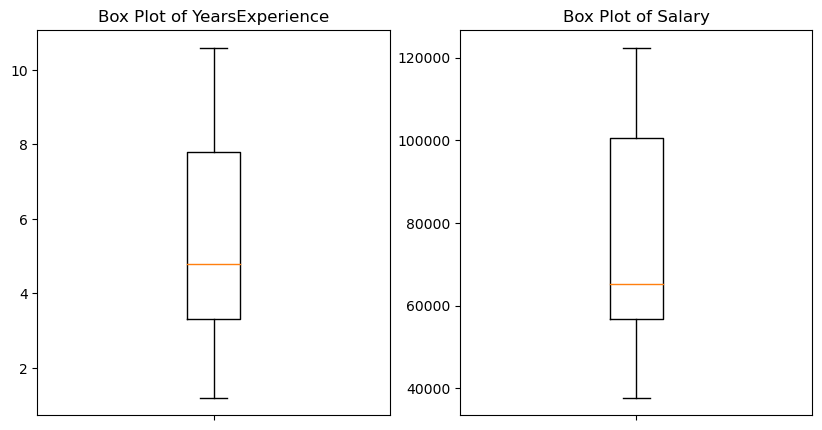

In [9]:
# Make a figure dan axes to show the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Make a box plot for YearsExperience in the first axes
axes[0].boxplot(df['YearsExperience'])
axes[0].set_title('Box Plot of YearsExperience')
axes[0].set_xticklabels([''])

# Make a box plot untuk Salary in the second axes
axes[1].boxplot(df['Salary'])
axes[1].set_title('Box Plot of Salary')
axes[1].set_xticklabels([''])

# show the plot
plt.show()

#Explanation of each part of the code:

> **`fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))`** : This line initializes a figure (fig) and a pair of subplots (axes) with 1 row and 2 columns. It sets the figure size to be 10 units wide and 5 units tall.

> **`axes[0].boxplot(df['YearsExperience'])`**: This creates the
first box plot on the left subplot (axes[0]) using the data from
the 'YearsExperience' column of the df dataframe.

> **`axes[0].set_title('Box Plot of YearsExperience')`**: This sets the title of the left subplot as "Box Plot of YearsExperience".

> **`axes[0].set_xticklabels([''])`**: This line sets the x-axis tick labels of the left subplot to be an empty list, effectively hiding the tick labels. This is done to remove the numeric values on the x-axis.

> **`axes[1].boxplot(df['Salary'])`**: This creates the second box plot on the right subplot (axes[1]) using the data from the 'Salary' column of the df dataframe.

> **`axes[1].set_title('Box Plot of Salary')`**: This sets the title of the right subplot as "Box Plot of Salary".

> **`axes[1].set_xticklabels([''])`**: This line sets the x-axis tick labels of the right subplot to be an empty list, effectively hiding the tick labels. This is done to remove the numeric values on the x-axis.

> **`plt.show()`**: This line displays the side-by-side box plots in the figure.

**NOTE:**

*   axes[0] for YearsExperience.
*   axes[1] for Salary.




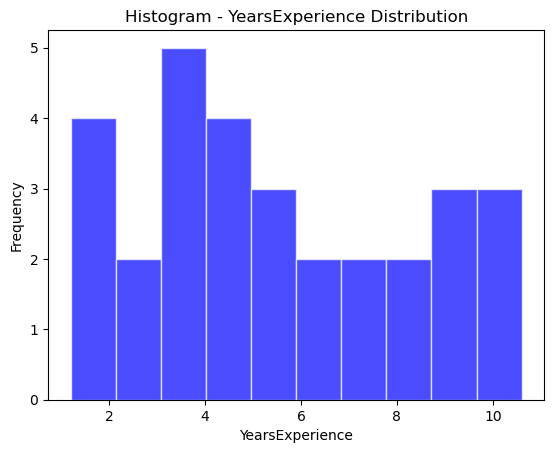

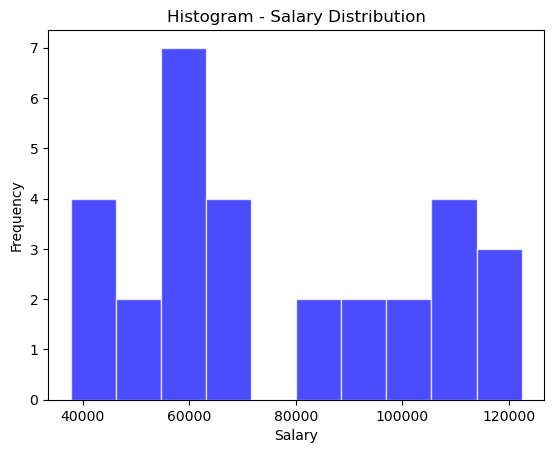

In [10]:
# Histogram of YearsExperience
plt.hist(df['YearsExperience'], bins=10, color='blue', edgecolor='white', alpha=0.7)
plt.xlabel('YearsExperience')
plt.ylabel('Frequency')
plt.title('Histogram - YearsExperience Distribution')
plt.show()

# Histogram of Salary
plt.hist(df['Salary'], bins=10, color='blue', edgecolor='white', alpha=0.7)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram - Salary Distribution')
plt.show()

#Explanation of each part of the code:

**Histogram of 'YearsExperience':**

> **`plt.hist(df['YearsExperience'], bins=10, color='blue', edgecolor='white', alpha=0.7)`**: This line creates a histogram for the 'YearsExperience' column in the DataFrame df.
df['YearsExperience']: This selects the 'YearsExperience' column from the DataFrame df and provides it as the data for the histogram.

* **`bins=10`**: This sets the number of bins or intervals into which the data will be divided for creating the histogram. In this case, there will be 10 bins.
* **`color='blue'`**: This sets the color of the bars in the histogram to blue.
* **`edgecolor='white'`**: This sets the color of the edges of the bars to white, providing a clear separation between adjacent bars.
* **`alpha=0.7`**: This sets the transparency of the bars to 0.7, making them slightly transparent.

> **`plt.xlabel('YearsExperience')`**: This sets the label for the x-axis to 'YearsExperience'.

> **`plt.ylabel('Frequency')`**: This sets the label for the y-axis to 'Frequency'.

> **`plt.title('Histogram - YearsExperience Distribution')`**: This sets the title of the histogram plot to 'Histogram - YearsExperience Distribution'.

> **`plt.show()`**: This displays the histogram plot.

**Histogram of 'Salary':**

The code for the second histogram is almost identical to the first one, except it uses the 'Salary' column as the data for the histogram and sets the appropriate labels and title for the plot.

#**Data modelling - Linear Regression Model**

In [11]:
reg = linear_model.LinearRegression()
reg.fit(df[['YearsExperience']], df.Salary)

LinearRegression()

#Explanation of each part of the code:

> **`reg = linear_model.LinearRegression()`**: This line creates an instance of the LinearRegression class from the scikit-learn library and assigns it to the variable reg. The LinearRegression class represents a linear regression model.

> **`reg.fit(df[['YearsExperience']], df.Salary)`**: The fit() method is called on the reg object to train the linear regression model. It takes two arguments: the input data X (in this case, the 'YearsExperience' column from the DataFrame df) and the target data y (in this case, the 'Salary' column from the DataFrame df). The fit() method calculates the coefficients (slope) and intercept of the linear regression line that best fits the data.

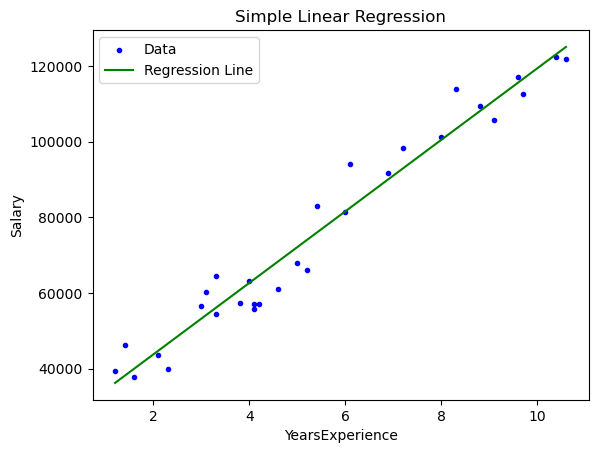

In [12]:
%matplotlib inline
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.scatter(df.YearsExperience, df.Salary, color='blue', marker = '.', label ='Data')
plt.plot(df.YearsExperience, reg.predict(df[['YearsExperience']]), color = 'green', label ='Regression Line')
plt.legend()


#Explanation of each part of the code:

> **`%matplotlib inline`**: This line is used to display the plot inline in the Jupyter Notebook, allowing the visualization to appear directly below the code cell.

> Plotting the Data and Regression Line:

* **`plt.xlabel('YearsExperience')`**: Sets the label for the x-axis as 'YearsExperience'.

* **`plt.ylabel('Salary')`**: Sets the label for the y-axis as 'Salary'.

* **`plt.title('Simple Linear Regression')`**: Sets the title of the plot as 'Simple Linear Regression'.

* **`plt.scatter(df.YearsExperience, df.Salary, color='blue', marker='.', label='Data')`**: This line creates a scatter plot with the 'YearsExperience' on the x-axis and 'Salary' on the y-axis. The points are shown in blue color and marked with dots. The label 'Data' is used for the legend.

* **`plt.plot(df.YearsExperience, reg.predict(df[['YearsExperience']]), color='green', label='Regression Line')`**: This line plots the linear regression line using the 'YearsExperience' as x-values and the predicted 'Salary' values from the regression model as y-values. The line is shown in green color, and the label 'Regression Line' is used for the legend.

* **`plt.legend()`**: Adds the legend to the plot to differentiate between the data points and the regression line.

To predicts the 'Salary' value for a given 'YearsExperience'. The model uses the input of n (years of experience) and predicts the corresponding 'Salary' value.

In [13]:
reg.predict([[10.6]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([125017.80457395])

#Explanation of the code:

> **`reg.predict([[10.6]])`**: This line predicts the 'Salary' value for a given 'YearsExperience'. The model uses the input of n equals to 10.6 .

In [14]:
reg.coef_

array([9449.96232146])

#Explanation of the code:
> This line retrieves the coefficient (slope) of the regression line, which represents how much 'Salary' changes for each unit change in 'YearsExperience'.

In [15]:
reg.intercept_

24848.203966523193

#Explanation of the code:

> This line retrieves the intercept of the regression line, which represents the 'Salary' value when 'YearsExperience' is zero.

# **Data Evaluation**

In [16]:
correlation_matrix = np.corrcoef(df.Salary, df.YearsExperience)
correlation_coefficient = correlation_matrix[0, 1]
print("Pearson Correlation (R):", correlation_coefficient)

slope, intercept, r_value, p_value, std_err = linregress(df.Salary, df.YearsExperience)
r_squared = r_value**2
print("Determination Coefficient (R^2):", r_squared)


Pearson Correlation (R): 0.9782416184887598
Determination Coefficient (R^2): 0.9569566641435084


# Explanation of each part of the code:

> **`correlation_matrix = np.corrcoef(df.Salary, df.YearsExperience)`**: This line calculates the correlation matrix using the NumPy function np.corrcoef(). The correlation matrix is a 2x2 matrix where the diagonal elements represent the correlation of each variable with itself (which is always 1), and the off-diagonal element (position [0, 1] or [1, 0]) represents the correlation between "Salary" and "YearsExperience."

> **`correlation_coefficient = correlation_matrix[0, 1]`**: This line extracts the correlation coefficient (R) from the correlation matrix. The correlation coefficient is the value at the position [0, 1] or [1, 0] of the correlation matrix, representing the correlation between "Salary" and "YearsExperience."

> **`print("Pearson Correlation (R):", correlation_coefficient)`**: This line prints the calculated Pearson Correlation (R) between "Salary" and "YearsExperience."

> **`slope, intercept, r_value, p_value, std_err = linregress(df.Salary, df.YearsExperience)`**: This line performs linear regression analysis using the linregress function. It takes "Salary" as the independent variable (x) and "YearsExperience" as the dependent variable (y) and returns the slope, intercept, r-value (correlation coefficient), p-value (significance), and standard error.

> **`r_squared = r_value^2`** : This line calculates the Determination Coefficient (R^2) by squaring the r-value obtained from the linear regression analysis.

> **`print("Determination Coefficient (R^2):", r_squared)`**: This line prints the calculated Determination Coefficient (R^2) between "Salary" and "YearsExperience."

#**Conclusion:**

**1. Coefficients:**

* Intercept (a): The intercept or constant value in a linear regression model indicates the predicted value of the dependent variable ("Salary") when the independent variable ("YearsExperience") is zero. In the example above, the intercept is approximately 24,848.203966523193.

* Slope (b): The slope of the linear regression line indicates the average change in the dependent variable "Salary" for each one-unit change in the independent variable "YearsExperience". In the example above, the slope is approximately 9,449.96232146. This means that the average salary increase is about 9,449.96232146 for each one-year increase in experience. Based on the positive slope, it can be concluded that there is a positive relationship between YearsExperience and Salary, which means that the higher the YearsExperience, the higher the expected Salary.

**2. Correlation:**

Based on the example above, the Pearson correlation (R) is 0.9782416184887598, which is close to 1, indicates a strong positive linear relationship between YearsExperience and Salary.

**3. R-squared (R^2):**

R-squared is a value that indicates how well a linear regression model can explain the variability of the data. R-squared values range from 0 to 1. The closer to 1, the better the model can explain the data. In the example above, the R-squared value is 0.9569566641435084, which is close to 1. This indicates that about 95.7% of the variability in "Salary" can be explained by the variability in "YearsExperience". In other words, the regression model used is very effective in explaining the relationship between work experience and salary, and almost all the variability in salary can be attributed to the experience of the individual.

**4. Regression Plot:**

The linear regression plot shows the regression line (green line) that attempts to predict the relationship between "YearsExperience" and "Salary" based on the given data. The plot also displays the original data as blue dots. The better the regression line fits the original data points, the better the model performs.